# CLUSTERING USE CASE_Fransdana Nadeak

## Import Library

In [624]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1. Memanggil Library yang dibutuhkan 
from sklearn.cluster import DBSCAN
from sklearn import datasets
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

## Load Dataset

In [625]:
data=pd.read_csv('german_credit_data.csv')
#dataclean=pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Drop Useless Variabel >> Unnamed: 0

In [626]:
data=data.drop(data.columns[0],axis=1)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Missing Value Analysis

### Missing Value Visualization

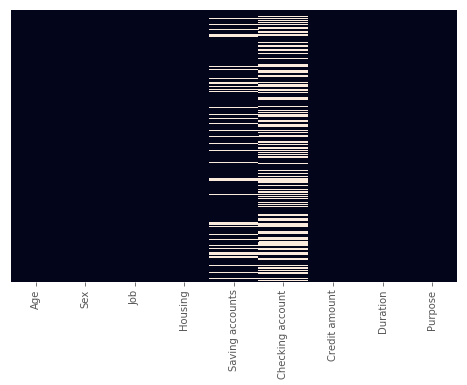

In [627]:
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [628]:
#count how much the percentage of missing value for each field
percentage = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
percentage

Checking account    39.4
Saving accounts     18.3
Purpose              0.0
Duration             0.0
Credit amount        0.0
Housing              0.0
Job                  0.0
Sex                  0.0
Age                  0.0
dtype: float64

Dari Hasil identifikasi Missing Value, datap dilihat bahwa ada 2 variabel yang memiliki missing value, yaitu variable Checking account dan Saving accounts. Dikarenakan Variabel Checking accounts memiliki missing value hampir 40%, maka variabel ini akan dihilangkan, sedangkan variabel Saving accounts akan di imputasi dengan nilai modus

## Handling Missing Value

#### Drop Variabel "Checking Account"

In [629]:
data=data.drop('Checking account',1)

#### Imputasi dengan Modus untuk variable "Saving accounts"

In [630]:
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)

In [631]:
#count how much the percentage of missing value for each field
percentage = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
percentage

Purpose            0.0
Duration           0.0
Credit amount      0.0
Saving accounts    0.0
Housing            0.0
Job                0.0
Sex                0.0
Age                0.0
dtype: float64

Setelah di imputasi, maka sudah tidak ada missing value lagi

### Meng-kategorikan variabel Job

In [632]:
data['Job']=pd.Categorical(data['Job'])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,male,2,own,little,1169,6,radio/TV
1,22,female,2,own,little,5951,48,radio/TV
2,49,male,1,own,little,2096,12,education
3,45,male,2,free,little,7882,42,furniture/equipment
4,53,male,2,free,little,4870,24,car


## Feature Engineering

#### Dikarenakan Risk dari customer tidak bisa ditentukan dari jumlah Credit Ammount ataupun Durationnnya, maka akan dibentuk suatu feature baru yang mungkin dapat merepresentasikan resiko seorang customer, yaitu dengan membagi Credit amount dengan Duration

#### Seharusnya, semakin kecil risk nya, semakin berpeluang orang itu untuk terlambat membayar

In [633]:
data['risk']=data['Credit amount']/data['Duration']
data.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,risk
0,67,male,2,own,little,1169,6,radio/TV,194.833333
1,22,female,2,own,little,5951,48,radio/TV,123.979167
2,49,male,1,own,little,2096,12,education,174.666667
3,45,male,2,free,little,7882,42,furniture/equipment,187.666667
4,53,male,2,free,little,4870,24,car,202.916667


### Transformasi Logaritma

Text(0.5,1,'Log Risk')

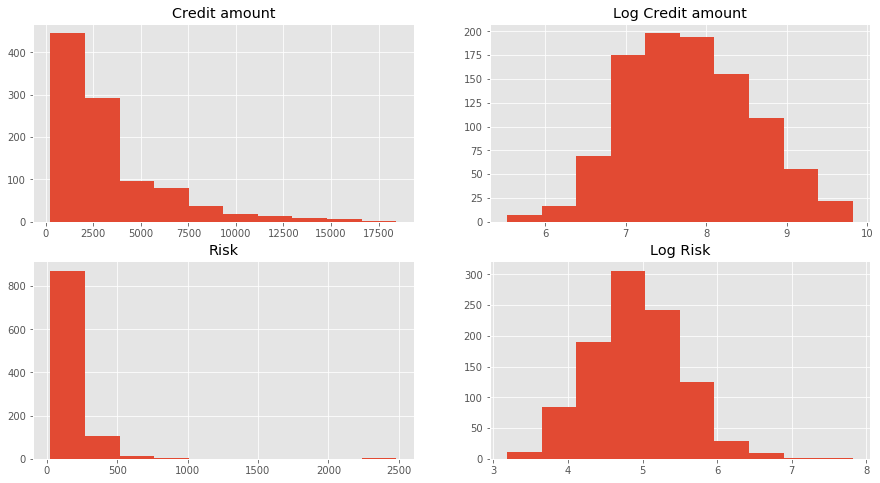

In [638]:
f=plt.figure(figsize=(15,8))
f.add_subplot(2,2,1)
data['Credit amount'].hist()
plt.title('Credit amount')
f.add_subplot(2,2,2)
np.log(data['Credit amount']).hist()
plt.title('Log Credit amount')
f.add_subplot(2,2,3)
data['risk'].hist()
plt.title('Risk')
f.add_subplot(2,2,4)
np.log(data['risk']).hist()
plt.title('Log Risk')


Berikut merupakan Sebaran Variabel Credit Amount dan Risk. Terlihat bahwa kedua variabel itu sangat menyebar ke kanan. Dikarenakan kemenjuluran itu, dilakukan transformasi logaritma untuk masing-masing variabel. Setelah di transformasi, Terlihat bahwa kedua variabel tersebut sudah terlihat menyebar secara normal ataupun simetris 

In [639]:
data2=pd.DataFrame(data)
data2['Credit amount']=np.log(data2['Credit amount'])
data2['risk']=np.log(data2['risk'])

data2.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,risk
0,67,male,2,own,little,7.063904,6,radio/TV,5.272144
1,22,female,2,own,little,8.691315,48,radio/TV,4.820114
2,49,male,1,own,little,7.647786,12,education,5.162879
3,45,male,2,free,little,8.972337,42,furniture/equipment,5.234667
4,53,male,2,free,little,8.490849,24,car,5.312795


In [536]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,risk
0,67,male,2,own,little,7.063904,6,radio/TV,5.272144
1,22,female,2,own,little,8.691315,48,radio/TV,4.820114
2,49,male,1,own,little,7.647786,12,education,5.162879
3,45,male,2,free,little,8.972337,42,furniture/equipment,5.234667
4,53,male,2,free,little,8.490849,24,car,5.312795


## Korelasi antar Variabel Numerik

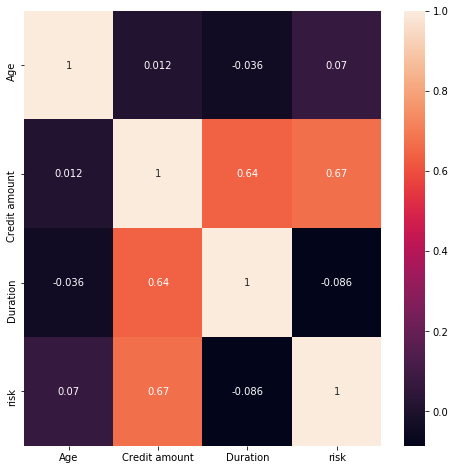

In [537]:
plt.figure(figsize=(8,8))
sns.heatmap(data2.drop(['Sex','Job','Saving accounts','Purpose'],1).corr(),annot=True)

### Standardisasi Variabel 

Standardisasi digunakan agar semua variabel diubah dalam bentuk 1 skala pengukuran

In [538]:
numerical=['Age','risk','Duration','Credit amount']
dataNum=data2[numerical]
dataKat=data2.drop(numerical,1)

#data2=pd.get_dummies(data2)
#data2.head()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataNum)
X_scaled=pd.DataFrame(X_scaled,columns=dataNum.columns)
X_scaled.head()


C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,risk,Duration,Credit amount
0,2.766456,0.585602,-1.236478,-0.933901
1,-1.191404,-0.148743,2.248194,1.163046
2,1.183312,0.408096,-0.738668,-0.181559
3,0.831502,0.524719,1.750384,1.525148
4,1.535122,0.651641,0.256953,0.904743


In [539]:
data2=pd.concat([X_scaled,dataKat],1)
data2.head()

,Age,risk,Duration,Credit amount,Sex,Job,Housing,Saving accounts,Purpose
0,2.766456,0.585602,-1.236478,-0.933901,male,2,own,little,radio/TV
1,-1.191404,-0.148743,2.248194,1.163046,female,2,own,little,radio/TV
2,1.183312,0.408096,-0.738668,-0.181559,male,1,own,little,education
3,0.831502,0.524719,1.750384,1.525148,male,2,free,little,furniture/equipment
4,1.535122,0.651641,0.256953,0.904743,male,2,free,little,car


### Dummy Variabel untuk data kategorik

In [540]:
data2=pd.get_dummies(data2)
data2.head()


,Age,risk,Duration,Credit amount,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.585602,-1.236478,-0.933901,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.191404,-0.148743,2.248194,1.163046,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.183312,0.408096,-0.738668,-0.181559,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.831502,0.524719,1.750384,1.525148,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1.535122,0.651641,0.256953,0.904743,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# Clustering K-Means

### Reduksi Dimensi dengan PCA

Dikarenakan Variabel yang akan di klaster kan lebih dari 3 dan tidak mungkin dapat divisualisasikan seperti biasa, maka akan dilakukan Preduksian Dimensi dengan PCA menjadi 2 dimensi agar bisa divisulisasikan clusternya

In [541]:
# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data2)

In [542]:
# Save components to a DataFrame
pca_kol=['PCA1','PCA2']
PCA_components = pd.DataFrame(principalComponents,columns=pca_kol)
PCA_components.head()

,PCA1,PCA2
0,-0.858688,2.579242
1,1.569290,-2.337983
2,-0.246016,1.477580
3,2.306828,-0.390035
4,1.319873,1.083926


### Hasil Plot PCA 1 dan PCA 2

Text(0,0.5,'PCA 2')

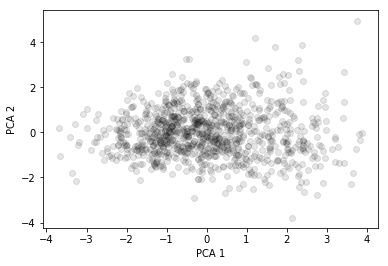

In [543]:
plt.scatter(PCA_components['PCA1'], PCA_components['PCA2'], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Mencari k terbaik untuk K-Means Clustering

#### Elbhow Method

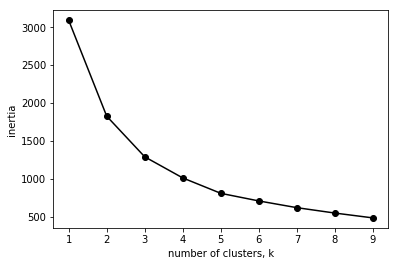

In [544]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Dari elbow method, dapat dilihat bahwa banyak k terbaik untuk klaster ini ada di antara 3 dan 4 klaster. Selanjutnya akan dilihat silhoutte dari masing2 k dengan metode silhoutte untuk menentukan k terbaik

#### Average Silhouette

In [545]:
range_n_clusters = [2, 3, 4, 5, 6,7]
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.37577996238782735)
For n_clusters = 3, silhouette score is 0.3621208097761894)
For n_clusters = 4, silhouette score is 0.3411024327323149)
For n_clusters = 5, silhouette score is 0.3441933001298676)
For n_clusters = 6, silhouette score is 0.33649156379500866)
For n_clusters = 7, silhouette score is 0.33114080458087075)


Dari Nilai Silhouette di atas, dapat dilihat bahwa k=3 merupakan banyak klaster yang paling optimal karena Nilai Silhouette nya paling besar

In [546]:
# Menjadijkan Array
X=np.asarray(PCA_components)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Visualisasi K-Means Clustering

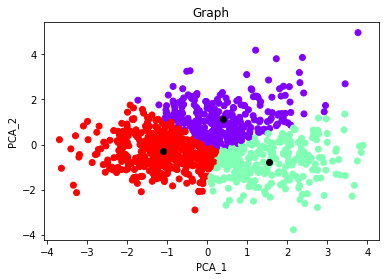

Silhouette Coefficient: 0.362


In [568]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("Graph")
plt.show()
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, kmeans.labels_))

Dari hasil K-Means PCA, terlihat ada 3 Cluster yang terpisah, namun di Cluster ke 3 terdapat sebuah titik pencilan atau anomali. Kondisi ini tidak dapat ditangkap dengan K-Means Clustering

In [548]:
# Memasukkan hasil label ke dalam suatu
km_data_clustered = pd.DataFrame(data)
km_data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
km_data_clustered['Credit amount']=np.exp(km_data_clustered['Credit amount'])
km_data_clustered['risk']=np.exp(km_data_clustered['risk'])
km_data_clustered.head()


,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,risk,cluster
0,67,male,2,own,little,1169.0,6,radio/TV,194.833333,0
1,22,female,2,own,little,5951.0,48,radio/TV,123.979167,1
2,49,male,1,own,little,2096.0,12,education,174.666667,0
3,45,male,2,free,little,7882.0,42,furniture/equipment,187.666667,1
4,53,male,2,free,little,4870.0,24,car,202.916667,0


## Splitting Dataframe Antar Cluster

In [549]:
km_cluster0=km_data_clustered[km_data_clustered['cluster']==0]
km_cluster1=km_data_clustered[km_data_clustered['cluster']==1]
km_cluster2=km_data_clustered[km_data_clustered['cluster']==2]
#km_cluster3=km_data_clustered[km_data_clustered['cluster']==3]

print('cluster0 : ',np.mean(km_cluster0['risk']))
print('cluster1 : ',np.mean(km_cluster1['risk']))
print('cluster2 : ',np.mean(km_cluster2['risk']))
#print('cluster3 : ',np.mean(km_cluster3['risk']))


cluster0 :  267.89246059082825
cluster1 :  183.21587359750473
cluster2 :  94.93073081171987


# Hierarchical Clustering

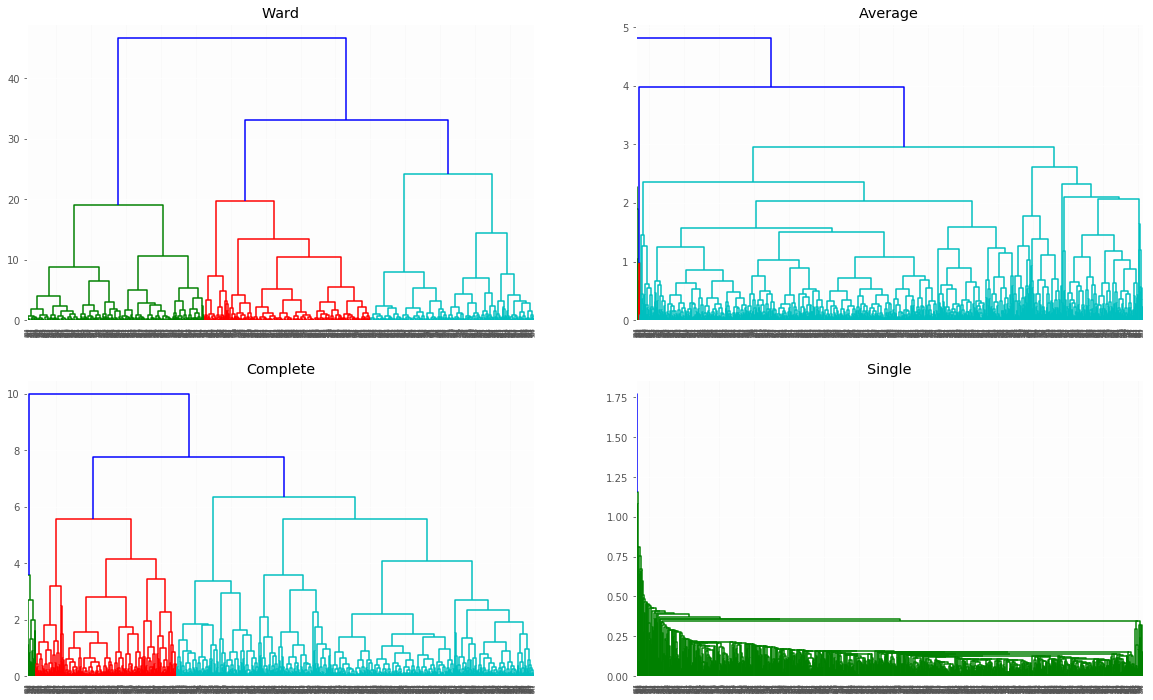

In [641]:
# Step 5. Membentuk dendogram dengan metode ward 
# ward, single, complete, average
f=plt.figure(figsize=(20, 12))
f.add_subplot(2,2,1)
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='ward'),
                            orientation='top')
plt.title('Ward')
f.add_subplot(2,2,2)
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='average'),
                            orientation='top')
plt.title('Average')
f.add_subplot(2,2,3)
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='complete'),
                            orientation='top')
plt.title('Complete')
f.add_subplot(2,2,4)
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='single'),
                            orientation='top')
plt.title('Single')

plt.show()

Dari hasil visualisasi terlihat bahwa pautan Ward memiliki Dendogram yang baik dan dapat memisahkan dengan baik antar amatan, oleh karena itu akan digunakan Dendogram dengan pautan Ward. Dari Dendogram tersebut, terlihat bahwa ada terdapat 3 klaster yang dapat memisahkan antar amatan  

### Melakukan fitting hierarchical clustering

In [551]:
 model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(PCA_components)
labels = model.labels_

### Plot Data setelah dilakukan hierarchical clustering

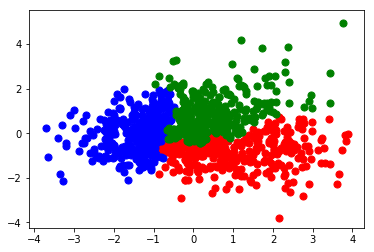

Silhouette Coefficient: 0.304


In [567]:
X2=np.asarray(PCA_components)
plt.scatter(X2[labels==0, 0], X2[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X2[labels==1, 0], X2[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X2[labels==2, 0], X2[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(X2[labels==3, 0], X2[labels==3, 1], s=50, marker='o', color='yellow')
plt.show()
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2, labels))

### Concat dataframe dengah Label dari Hierarchical Clustering

In [523]:
hr_data_clustered=pd.DataFrame(data)
hr_data_clustered['cluster']=labels
hr_data_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,risk,cluster
0,67,male,2,own,little,1169.0,6,radio/TV,194.833333,2
1,22,female,2,own,little,5951.0,48,radio/TV,123.979167,0
2,49,male,1,own,little,2096.0,12,education,174.666667,2
3,45,male,2,free,little,7882.0,42,furniture/equipment,187.666667,0
4,53,male,2,free,little,4870.0,24,car,202.916667,2


### Rata-rata Risk Tiap Cluster

In [553]:
hr_cluster0=hr_data_clustered[hr_data_clustered['cluster']==0]
hr_cluster1=hr_data_clustered[hr_data_clustered['cluster']==1]
hr_cluster2=hr_data_clustered[hr_data_clustered['cluster']==2]
#km_cluster3=km_data_clustered[km_data_clustered['cluster']==3]

print('cluster0 : ',np.mean(hr_cluster0['risk']))
print('cluster1 : ',np.mean(hr_cluster1['risk']))
print('cluster2 : ',np.mean(hr_cluster2['risk']))
#print('cluster3 : ',np.mean(km_cluster3['risk']))


cluster0 :  156.27523543201895
cluster1 :  96.28115526933381
cluster2 :  255.085336255039


# DBSCAN

In [603]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(PCA_components)

Text(0,0.5,'PCA 2')

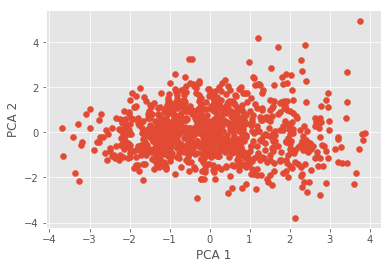

In [604]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

### Tuning Parameter DBSCAN (Epsilon & Min_Samples)

In [613]:
score=[]
eps=[]
min_sample=[]
for i in np.arange(0.2,0.,0.1):
    for j in np.arange(2,100,1):
        dbscan = DBSCAN(eps=i, min_samples =j)
        clusters = dbscan.fit_predict(X)
        s=metrics.silhouette_score(X, dbscan.labels_)
        score.append(s)
        eps.append(i)
        min_sample.append(j)

eval=pd.DataFrame()
eval['Epsilon']=eps
eval['Min_Samples']=min_sample
eval['Score']=score
eval.sort_values('Score',ascending=False).head()

,Epsilon,Min_Samples,Score
110,0.8,4,0.516326
109,0.8,3,0.515189
114,0.8,8,0.509007
118,0.8,12,0.509007
117,0.8,11,0.509007


## Visualisasi DBSCAN

Silhouette Coefficient: 0.256


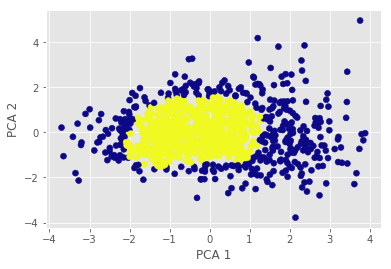

In [617]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
dbscan = DBSCAN(eps=0.45,min_samples=40)
clusters = dbscan.fit_predict(X)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, dbscan.labels_))

Berikut Merupakan Hasil Visualisasi DBSCAN, terlihat bahwa hasil dari DBSCAN tidak terlalu menggambarkan klasterisasi dari customer untuk credit scoring

### Berdasarkan hasil dari 3 metode klastering, dipilih lah Cluster K-means karena menggambarkan secara terpisah antar klaster dan memiliki Nilai Silhouette tertinggi.

### Oleh Karena itu, akan dilakukan analysis berdasarkan klaster yang dibuat dengan Method K-Means

## K_Means Clustering Analysis

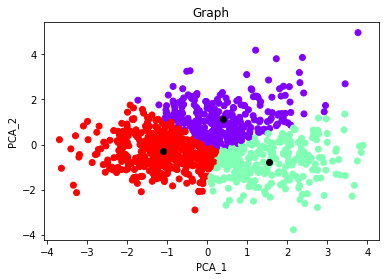

Silhouette Coefficient: 0.362


In [569]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("Graph")
plt.show()
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, kmeans.labels_))

## Penentuan Jenis Klaster ( Bad Risk/Medium Risk/Good Risk)

cluster0 :  267.89246059082825
cluster1 :  183.21587359750473
cluster2 :  94.93073081171987


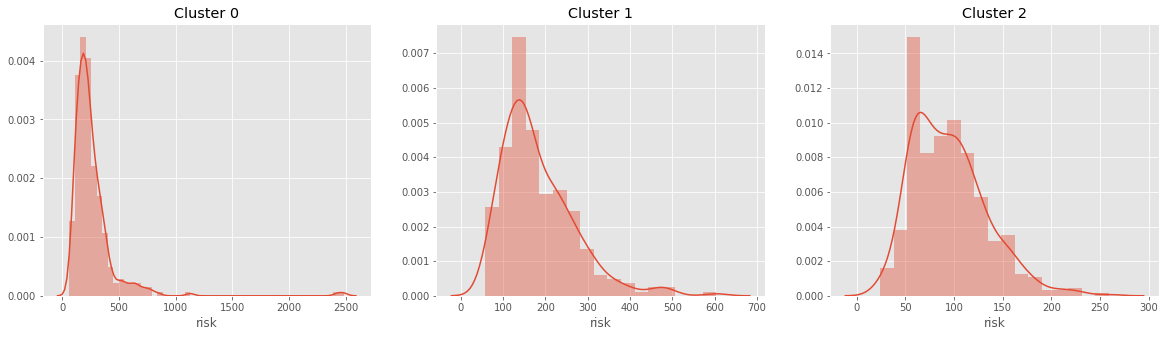

In [591]:
f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
sns.distplot(km_cluster0['risk'])
plt.title('Cluster 0')

f.add_subplot(1,3,2)
sns.distplot(km_cluster1['risk'])
plt.title('Cluster 1')

f.add_subplot(1,3,3)
sns.distplot(km_cluster2['risk'])
plt.title('Cluster 2')

print('cluster0 : ',np.mean(km_cluster0['risk']))
print('cluster1 : ',np.mean(km_cluster1['risk']))
print('cluster2 : ',np.mean(km_cluster2['risk']))

Penetuan klaster Good, Medium, dan Bad Risk dilakukan berdasarkan pengkategorikan dari perhitungan Risk nya. Semakin besar Risk, maka customer itu akan dikatakan Semakin Bad.

Dari Pengklasteran tersebut, terlihat bahwa Cluster0 memiliki Rata-rata Nilai Risk terbesar sebesar 267.89, diikuti dengan cluster 1 dan cluster 2. Oleh karena itu, dapat klaster2 tersebut dapat dikategorikan sebagai
1. Cluster0 = Bad Risk
2. Cluster1 = Medium Risk
3. Cluster2 = Good Risk

In [592]:
Bad_Risk=km_cluster0
Medium_Risk=km_cluster1
Good_Risk=km_cluster2

# AGE

Bad_risk_Age :  42.402061855670105
Medium_risk_Age :  32.468503937007874
Good_risk_Age :  32.879120879120876


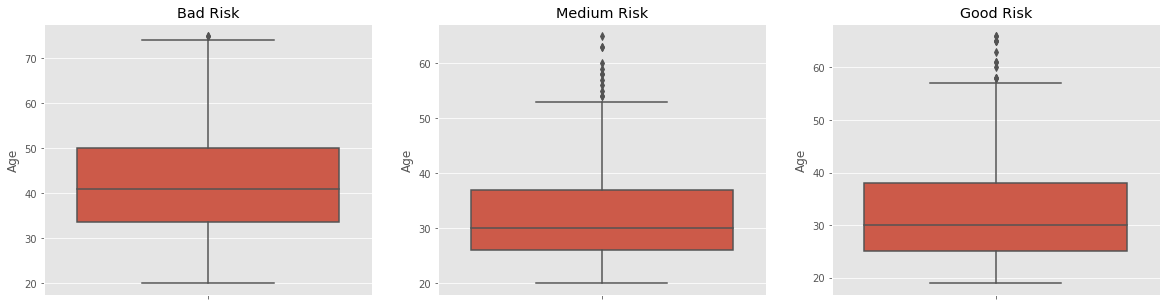

In [643]:
f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
sns.boxplot(y=Bad_Risk['Age'])
plt.title('Bad Risk')

f.add_subplot(1,3,2)
sns.boxplot(y=Medium_Risk['Age'])
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.boxplot(y=Good_Risk['Age'])
plt.title('Good Risk')

print('Bad_risk_Age : ',np.mean(Bad_Risk['Age']))
print('Medium_risk_Age : ',np.mean(Medium_Risk['Age']))
print('Good_risk_Age : ',np.mean(Good_Risk['Age']))

Dari Boxplot Umur untuk tiap klaster, dapat dilihat bahwa Umur customer untuk klaster Good dan Medium Risk tidak terlalu berbeda. Rata2 umur nya berada di sekitar 30-35 tahun dengan rata-rata 32 tahun. Sedangkan pada klaster yang Yang bad Risk,umur customer berada pada rentang umur yang lebih tinggi yaitu antara 38-50 tahun dengan rata-rata umur customer sebesar 42 tahun

# Credit Amount

Bad_risk_CreditAmount    :  3365.683848797251
Medium_risk_CreditAmount :  6391.751968503937
Good_risk_CreditAmount   :  1468.876923076923


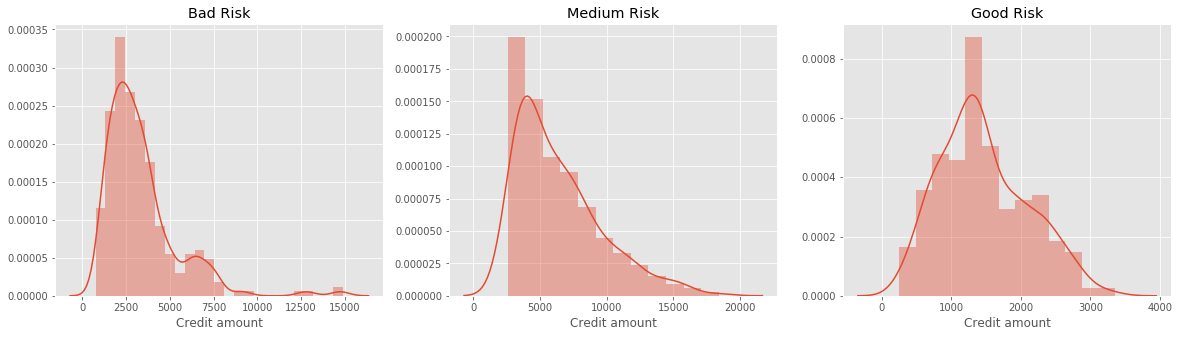

In [645]:
f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
sns.distplot(Bad_Risk['Credit amount'])
plt.title('Bad Risk')

f.add_subplot(1,3,2)
sns.distplot(Medium_Risk['Credit amount'])
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.distplot(Good_Risk['Credit amount'])
plt.title('Good Risk')

print('Bad_risk_CreditAmount    : ',np.mean(Bad_Risk['Credit amount']))
print('Medium_risk_CreditAmount : ',np.mean(Medium_Risk['Credit amount']))
print('Good_risk_CreditAmount   : ',np.mean(Good_Risk['Credit amount']))

Dari sebaran histogram Credit Amount untuk tiap klaster, dapat dilihat bahwa pada klaster Good_Risk, Jumlah kredit yang dipinjam dan didapat oleh customer terlihat menyebar normal antara 1000-2000 dengan rata-rata 1468, sedangkan di klaster Medium risk,Jumlah Kredit yang dipinjam bernilai sangat tinggi, dengan rata2 6391. Sedangkan di Klaster yang Bd_Risk, ternyata jumlah yang dipinjamkan tidak sebesar di klaster Medium Risk. rata-rata kredit yang dipinjamkan sebesar 3365.

Sehingga dapat disimpulkan semakin besar Jumlah Kredit yang dipinjamkan tidak menjamin seorang customer memiliki risiko tinggi untuk terlambat membayar. Malahan, yang pinjaman kreditnya tinggi, termasuk ke dalam kelas Medium_Risk

# Duration

Bad_risk_Duration    :  14.219931271477662
Medium_risk_Duration :  36.12204724409449
Good_risk_Duration   :  16.681318681318682


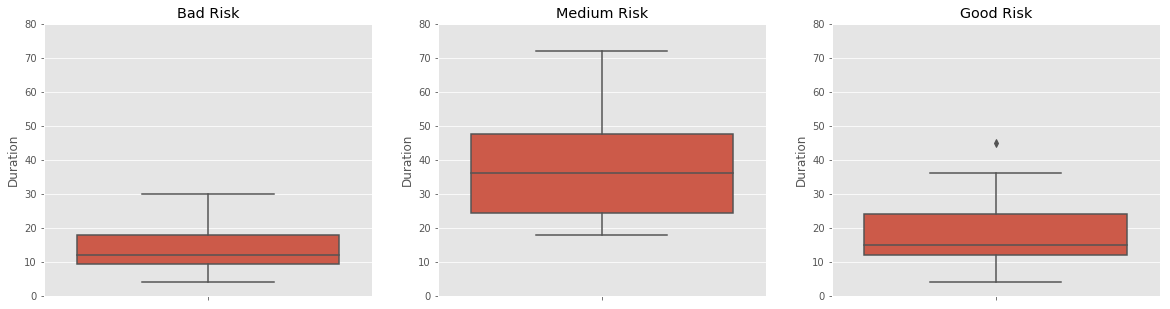

In [647]:
f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
sns.boxplot(y=Bad_Risk['Duration'])
plt.ylim(0,80)
plt.title('Bad Risk')

f.add_subplot(1,3,2)
sns.boxplot(y=Medium_Risk['Duration'])
plt.ylim(0,80)
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.boxplot(y=Good_Risk['Duration'])
plt.ylim(0,80)
plt.title('Good Risk')

print('Bad_risk_Duration    : ',np.mean(Bad_Risk['Duration']))
print('Medium_risk_Duration : ',np.mean(Medium_Risk['Duration']))
print('Good_risk_Duration   : ',np.mean(Good_Risk['Duration']))

Dari sebaran histogram Duration untuk tiap klaster, dapat dilihat bahwa pada klaster Good_Risk, Durasi customer untuk membayar pinjaman kreditnya terlihat menyebar di antara 12-22 hari dengan rata-rata 14.2 hari, sedangkan di klaster Medium risk,Durasi pembayarannya ternyata bervariasi dan cenderung lama dengan rata2 36 hari. Sedangkan di Klaster yang Bad_Risk, ternyata jumlah yang dipinjamkan tidak Selama di klaster Medium Risk. rata-rata durasinya sekitar 14 hari.

Sehingga dapat disimpulkan semakin lama Durasi Pemabayaran kredityang dipinjamkan tidak menjamin seorang customer memiliki risiko tinggi untuk terlambat membayar.

# SEX

Text(0.5,1,'Good_Risk')

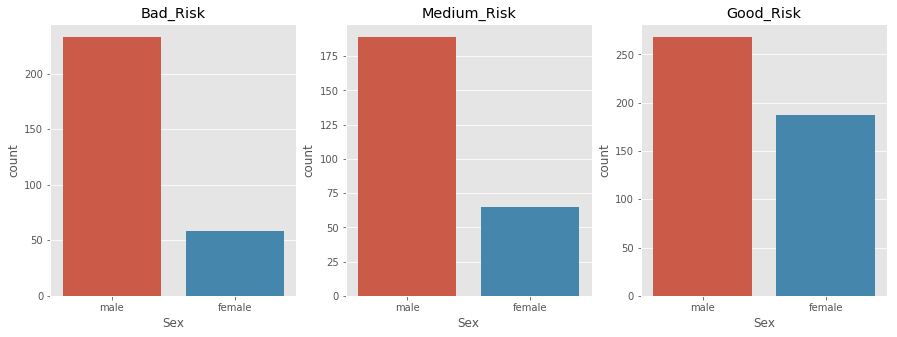

In [649]:
f=plt.figure(figsize=(15,5))
f.add_subplot(1,3,1)
sns.countplot(x=Bad_Risk['Sex'],
             order = Bad_Risk['Sex'].value_counts().index)
plt.title('Bad_Risk')
f.add_subplot(1,3,2)
sns.countplot(x=Medium_Risk['Sex'],
             order = Medium_Risk['Sex'].value_counts().index)
plt.title('Medium_Risk')
f.add_subplot(1,3,3)
sns.countplot(x=Good_Risk['Sex'],
             order = Good_Risk['Sex'].value_counts().index)
plt.title('Good_Risk')

Dari Barplot di atas, terlihat banyak kebanyakan customer adalah laki-laki. Lalu, didapat juga insight bahwa semakin tinggi risknya, semakin rendah customer yang berjenis kelamin perempuan

# JOB

Text(0.5,1,'Good_Risk')

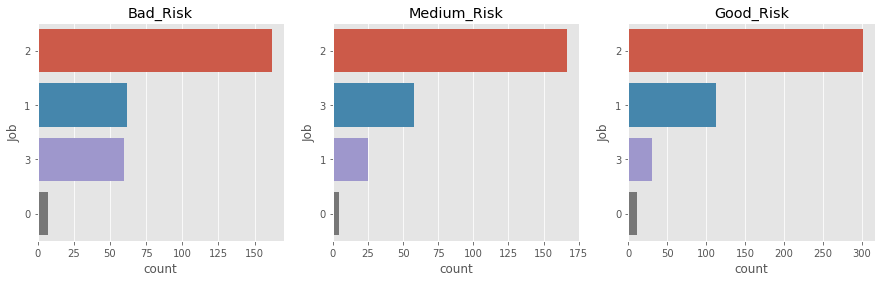

In [652]:
f=plt.figure(figsize=(15,4))
f.add_subplot(1,3,1)
sns.countplot(y=Bad_Risk['Job'],
             order = Bad_Risk['Job'].value_counts().index)
plt.title('Bad_Risk')
f.add_subplot(1,3,2)
sns.countplot(y=Medium_Risk['Job'],
             order = Medium_Risk['Job'].value_counts().index)
plt.title('Medium_Risk')
f.add_subplot(1,3,3)
sns.countplot(y=Good_Risk['Job'],
             order = Good_Risk['Job'].value_counts().index)
plt.title('Good_Risk')

Dari Barplot di atas terlihat bhawa kebanyakna customer ada di job 2 dari berbagai level risk, diikuti dengan Job 3, namun, di level medium, Job terbanyak kedua adalah Job tipe 3

# Housing

Text(0.5,1,'Good_Risk')

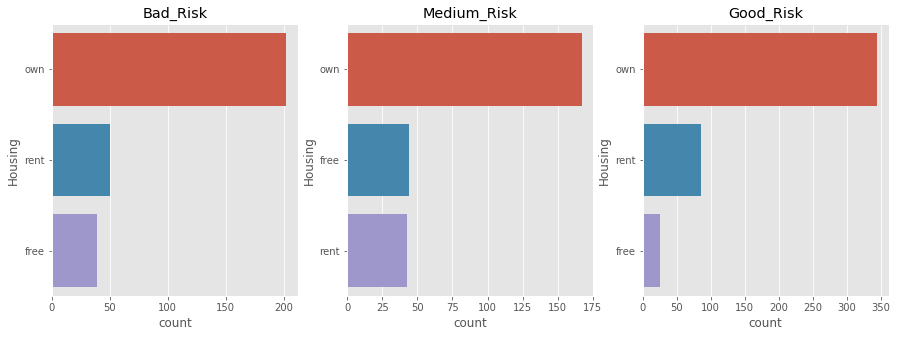

In [653]:
f=plt.figure(figsize=(15,5))
f.add_subplot(1,3,1)
sns.countplot(y=Bad_Risk['Housing'],
             order = Bad_Risk['Housing'].value_counts().index)
plt.title('Bad_Risk')
f.add_subplot(1,3,2)
sns.countplot(y=Medium_Risk['Housing'],
             order = Medium_Risk['Housing'].value_counts().index)
plt.title('Medium_Risk')
f.add_subplot(1,3,3)
sns.countplot(y=Good_Risk['Housing'],
             order = Good_Risk['Housing'].value_counts().index)
plt.title('Good_Risk')

# Saving Accounts

Text(0.5,1,'Good_Risk')

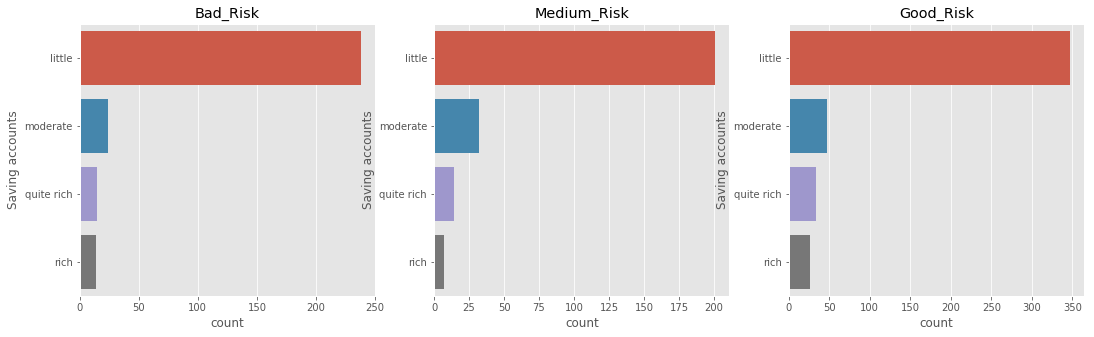

In [655]:
f=plt.figure(figsize=(18,5))
f.add_subplot(1,3,1)
sns.countplot(y=Bad_Risk['Saving accounts'],
             order = Bad_Risk['Saving accounts'].value_counts().index)
plt.title('Bad_Risk')
f.add_subplot(1,3,2)
sns.countplot(y=Medium_Risk['Saving accounts'],
             order = Medium_Risk['Saving accounts'].value_counts().index)
plt.title('Medium_Risk')
f.add_subplot(1,3,3)
sns.countplot(y=Good_Risk['Saving accounts'],
             order = Good_Risk['Saving accounts'].value_counts().index)
plt.title('Good_Risk')

Tidak ada perbedaan tingkat Saving Accounts terhadap level risk seseorang customer. Saving Accounts terbanyak tetap pada Saving Accounts jenis Little, lalu diikuti dengan moderate

# Purpose

Text(0.5,1,'Good_Risk')

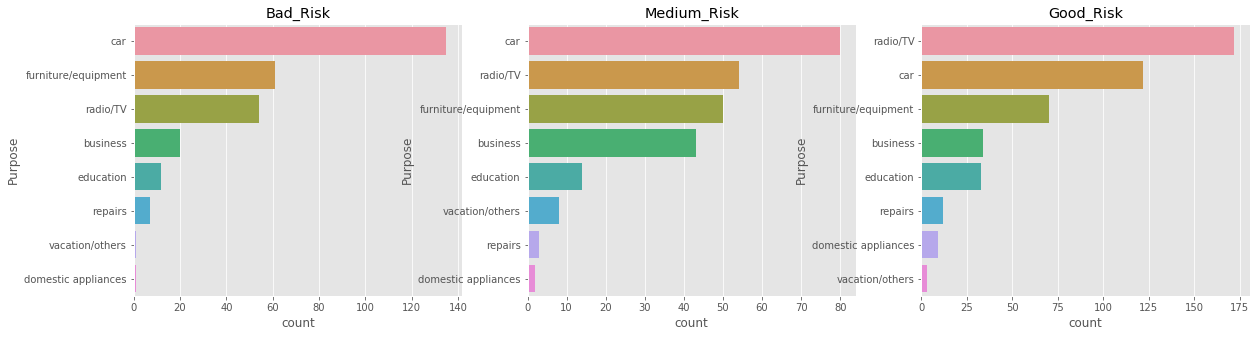

In [660]:
f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
sns.countplot(y=Bad_Risk['Purpose'],
             order = Bad_Risk['Purpose'].value_counts().index)
plt.title('Bad_Risk')
f.add_subplot(1,3,2)
sns.countplot(y=Medium_Risk['Purpose'],
             order = Medium_Risk['Purpose'].value_counts().index)
plt.title('Medium_Risk')
f.add_subplot(1,3,3)
sns.countplot(y=Good_Risk['Purpose'],
             order = Good_Risk['Purpose'].value_counts().index)
plt.title('Good_Risk')

Berikut barplot tujuan meminjam kredit berdasarkan klaster. Dari ketiga barplot, terlihat bahwa mayoritas customer meminjam kredit untuk pembelian mobil. Pola ini berlakui di klaster Bad dan medium, tetapi di kelas Good_risk, tujuan peminjaman kredit kebanyakan untuk pembelian alat2 elektronik seperti radio/TV, setelah itu baru mobil. Di klaster Bad_risk, ternyata peminjama kredit kedua terbanyak, kebanyak untuk membeli Furniture/Equipment. Dapat dikatakan bahwa kelas Bad_risk merupakan kelas dengan Tingkat kesejahteraan Custoemr yang sudah tinggi

# Terimakasih